In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("breastcancerdata.csv", header=0, index_col=None)

# PRE-PROCESSING THE DATA

In [3]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,0.059764,0.006422,1.615280,2.763911,153.40,0.007540,0.028043,0.05373,0.01587,0.027044,0.003133,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594,M
1,842517,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,0.074897,0.303622,1.171764,6.690985,74.08,0.003675,0.019118,0.01860,0.01340,0.021795,0.000128,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397,M
2,84300903,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,0.056730,0.289027,-0.546491,5.660769,94.03,0.009390,0.035186,0.03832,0.02058,0.020481,0.004616,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802,M
3,84348301,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,0.067824,0.765715,0.842057,-0.081625,27.23,0.006981,-0.028741,0.05661,0.01867,0.014801,0.003431,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210,M
4,84358402,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,0.070231,0.732142,1.830999,2.432024,94.44,0.006293,0.020667,0.05688,0.01885,0.026821,0.005654,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483,M


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [6]:
#CHECKING FOR MISSING VALUES
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [7]:
#FEATURE SELECTION BASED ON DOMAIN KNOWLEDGE-->ELIMINATING THE UNWANTED VARS
df=df.drop(["id"], axis=1)

In [8]:
df.shape

(569, 31)

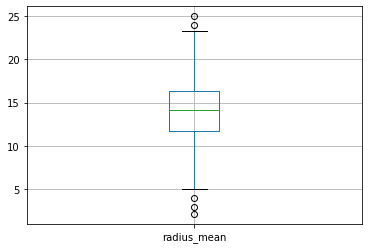

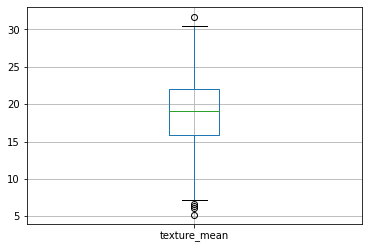

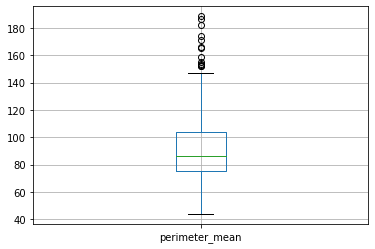

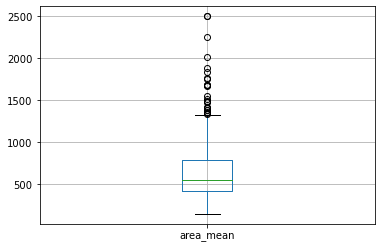

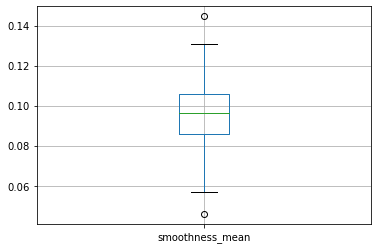

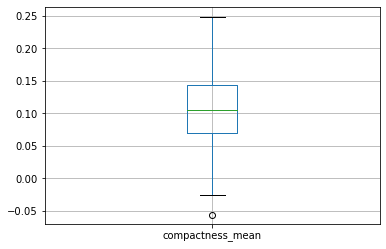

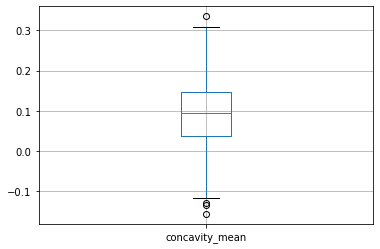

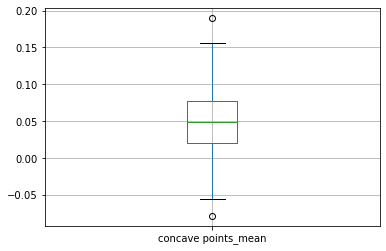

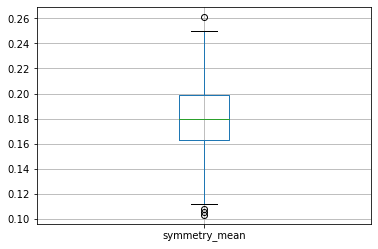

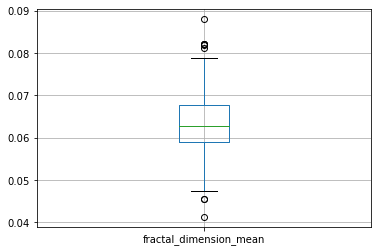

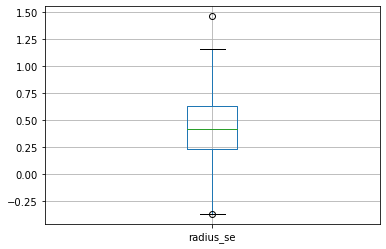

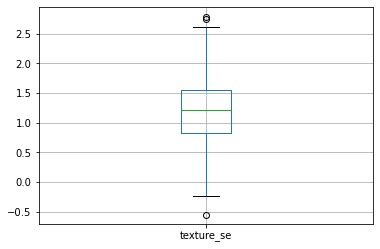

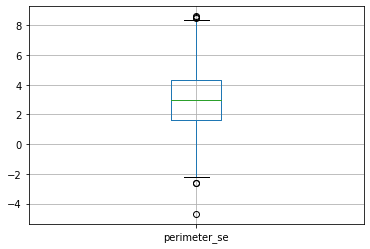

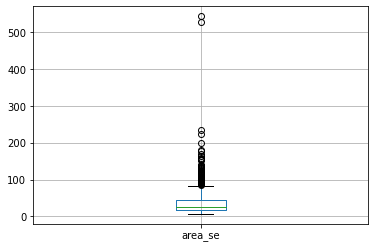

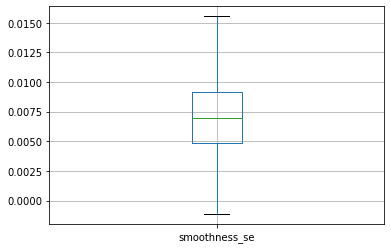

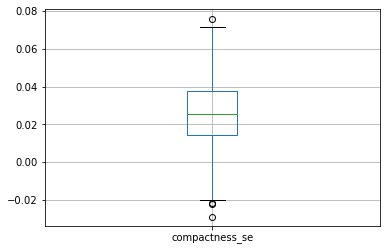

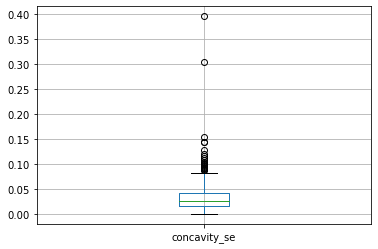

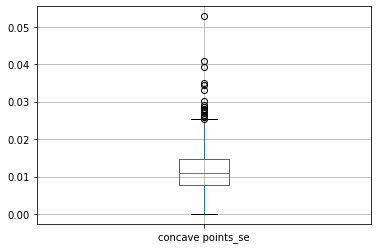

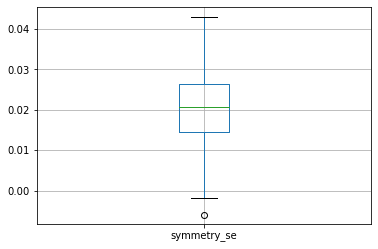

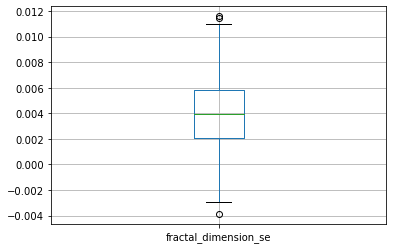

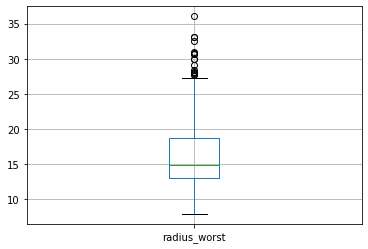

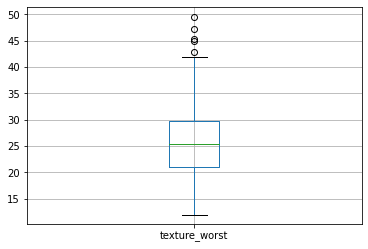

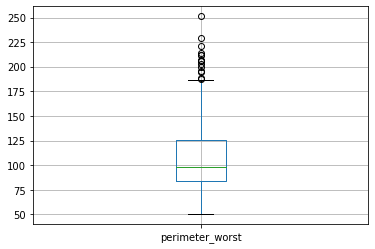

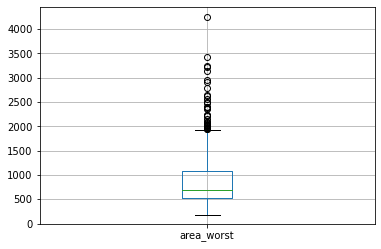

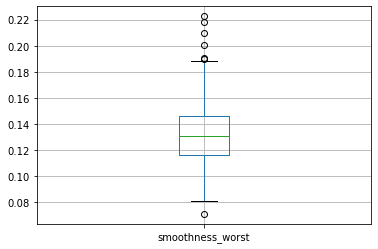

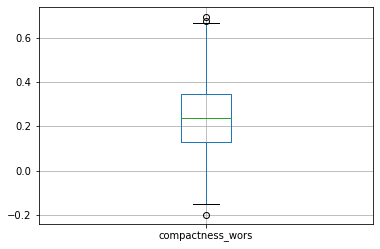

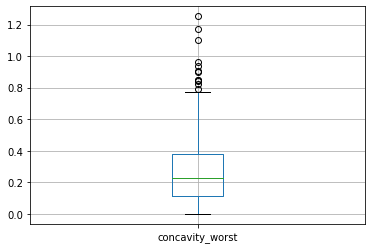

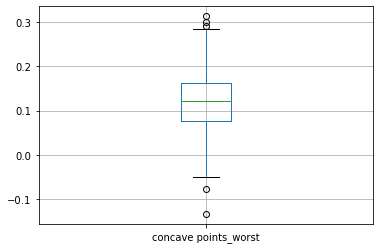

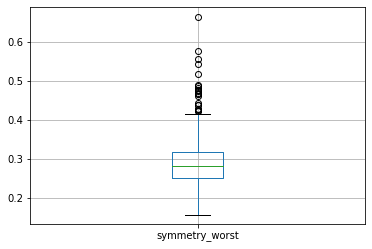

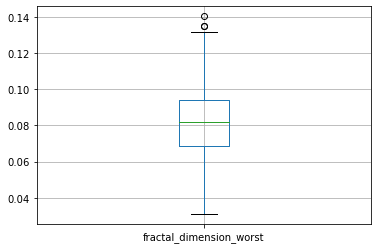

In [9]:
#CHECKING FOR OUTLIERS
colname=[]
for x in df.columns[:-1]:
    if df[x].dtype=="int64" or df[x].dtype=="float64":
        colname.append(x)

for x in colname:
    df.boxplot(column=x)
    plt.show()

In [10]:
'''There are outliers present in the data but since the it is a senitive data we won't be imputing it in order to be careful'''

"There are outliers present in the data but since the it is a senitive data we won't be imputing it in order to be careful"

In [11]:
#CONVERTING THE CATEGORICAL VAR TO NUMERIC VAR
'''Since only 1 variable is categorical, we are using the map() function instead of label encoder'''
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
#creating a dictionary for diagnosis variable
diag_dict={"B":0,"M":1}

In [13]:
#converting diagnosis variable to numeric
df["diagnosis"]=df["diagnosis"].map(diag_dict)

In [14]:
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors           float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [15]:
#CREATING X & Y
X=df.values[:,:-1]
Y=df.values[:,-1]

In [16]:
#SCALING THE DATA
from sklearn.preprocessing import StandardScaler
#create the object
scaler=StandardScaler()
#train/fit the object
X=scaler.fit_transform(X)
#print
print(X)

[[ 0.01388099  0.2608823   1.26993369 ... -0.02480519  2.75062224
   1.02593659]
 [ 1.26051192  0.76217786  1.68595471 ... -1.34045436 -0.24388967
  -0.17196168]
 [ 0.39601333 -0.16717969  1.56650313 ...  0.42262874  1.152255
   0.33561099]
 ...
 [ 1.73232327 -0.99339188  0.67267578 ... -0.12829506 -1.10454895
   0.85626876]
 [ 0.59711931  0.13095009  1.98252415 ... -0.84122877  1.91908301
  -0.43035761]
 [-0.26247369  1.34365981 -1.81438851 ...  1.08618289 -0.04813821
  -1.07973735]]


In [17]:
#SPLITTING THE DATA INTO TRAIN & TEST
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=10)
#test_size is given 0.2 since the no of obs is below 1000

# KNN CLASSIFIER

In [18]:
#BUILDING THE MODEL
from sklearn.neighbors import KNeighborsClassifier
#create model object
#K=root of n, thus 
knn=KNeighborsClassifier(n_neighbors=int(round(np.sqrt(len(X_train)),0)), metric="euclidean")
#train the object
knn.fit(X_train,Y_train)
#predict
Y_pred=knn.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.

In [19]:
#FINDING THE VALUE OF K--> ROOT OF N
int(round(np.sqrt(len(X_train)),0))

21

In [20]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[75  0]
 [ 7 32]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96        75
         1.0       1.00      0.82      0.90        39

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy Score- 0.9385964912280702


In [21]:
'''HERE WE CAN SEE THE ACCURACY SCORE & THE RECALL VALUES ARE PRETTY GOOD
& ALSO THERE IS NO TYPE 1 ERROR BUT LITTLE OF TYPE 2 ERROR'''

'HERE WE CAN SEE THE ACCURACY SCORE & THE RECALL VALUES ARE PRETTY GOOD\n& ALSO THERE IS NO TYPE 1 ERROR BUT LITTLE OF TYPE 2 ERROR'

In [22]:
#FINDING THE BEST K VALUE
#1.ELBOW METHOD
'''Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values,
then keep track of the error_rate for each of these models with a list.'''
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    error_rate.append(np.mean(Y_pred != Y_test))

Text(0, 0.5, 'Error Rate')

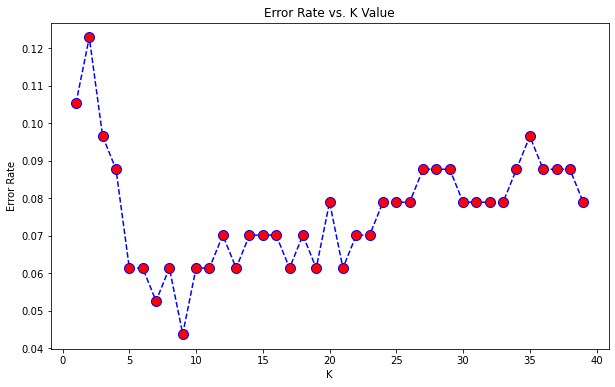

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
'''HERE WE CAN SEE THAT THERE IS A DRASTIC DROP TILL K=9'''

'HERE WE CAN SEE THAT THERE IS A DRASTIC DROP TILL K=9'

In [25]:
#REBUILDING THE MODEL USINT THE BEST K VALUE
from sklearn.neighbors import KNeighborsClassifier
#create model object
#K=root of n, thus 
knn=KNeighborsClassifier(n_neighbors=9, metric="euclidean")
#train the object
knn.fit(X_train,Y_train)
#predict
Y_pred=knn.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.

In [26]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[75  0]
 [ 5 34]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        75
         1.0       1.00      0.87      0.93        39

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score- 0.956140350877193


In [27]:
#2.TESTING A RANGE OF K VALUES
'''k values basically lies between 3 to root of n, its the same as the elbow method & easily evident best k vlaue'''
from sklearn.metrics import accuracy_score
for k in range(1,31):
    knn=KNeighborsClassifier(k,metric="euclidean")
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    print("Accuracy score is-", accuracy_score(Y_test,Y_pred), "for k-val",k)

Accuracy score is- 0.8947368421052632 for k-val 1
Accuracy score is- 0.8771929824561403 for k-val 2
Accuracy score is- 0.9035087719298246 for k-val 3
Accuracy score is- 0.9122807017543859 for k-val 4
Accuracy score is- 0.9385964912280702 for k-val 5
Accuracy score is- 0.9385964912280702 for k-val 6
Accuracy score is- 0.9473684210526315 for k-val 7
Accuracy score is- 0.9385964912280702 for k-val 8
Accuracy score is- 0.956140350877193 for k-val 9
Accuracy score is- 0.9385964912280702 for k-val 10
Accuracy score is- 0.9385964912280702 for k-val 11
Accuracy score is- 0.9298245614035088 for k-val 12
Accuracy score is- 0.9385964912280702 for k-val 13
Accuracy score is- 0.9298245614035088 for k-val 14
Accuracy score is- 0.9298245614035088 for k-val 15
Accuracy score is- 0.9298245614035088 for k-val 16
Accuracy score is- 0.9385964912280702 for k-val 17
Accuracy score is- 0.9298245614035088 for k-val 18
Accuracy score is- 0.9385964912280702 for k-val 19
Accuracy score is- 0.9210526315789473 for

In [28]:
'''HERE WE CAN SEE THAT FOR K VALUE 9 WE GET THE BEST ACCURACY SCORE OF 95%'''

'HERE WE CAN SEE THAT FOR K VALUE 9 WE GET THE BEST ACCURACY SCORE OF 95%'

In [29]:
#REBUILDING THE MODEL USINT THE BEST K VALUE
from sklearn.neighbors import KNeighborsClassifier
#create model object
#K=root of n, thus 
knn=KNeighborsClassifier(n_neighbors=9, metric="euclidean")
#train the object
knn.fit(X_train,Y_train)
#predict
Y_pred=knn.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.

In [30]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[75  0]
 [ 5 34]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        75
         1.0       1.00      0.87      0.93        39

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score- 0.956140350877193


# LOGISTIC REGRESSION

In [31]:
#BUILDING THE MODEL USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
#create the model object
lg=LogisticRegression()
#train the object
lg.fit(X_train,Y_train)
#predict
Y_pred=lg.predict(X_test)

#to see the actual & predicted values together
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.

In [32]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[73  2]
 [ 1 38]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        75
         1.0       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score- 0.9736842105263158


# DECISION TREE

In [33]:
#MODEL BUILDING USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier
#create an object
dt=DecisionTreeClassifier(criterion="gini", random_state=10) #criterion-->based on which the splits will be made
#train the object
dt.fit(X_train,Y_train)
#predict
Y_pred=dt.predict(X_test)
print(Y_pred)


[1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


In [34]:
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.

In [35]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[69  6]
 [ 0 39]]
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        75
         1.0       0.87      1.00      0.93        39

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score- 0.9473684210526315


In [41]:
from sklearn import tree
with open("model_DecisionTree.txt", "w") as f:  #Opening new file to store logs of DT performed 
    
    f = tree.export_graphviz(dt, feature_names=features,
                             out_file=f)
    

# RANDOM FOREST

In [42]:
#MODEL BUILDING USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
 
rfc=RandomForestClassifier(n_estimators=101,random_state=10)
 
#fit the model on the data and predict the values
rfc.fit(X_train,Y_train)
 
Y_pred=rfc.predict(X_test)
print(Y_pred)

[1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


In [43]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[73  2]
 [ 2 37]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        75
         1.0       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score- 0.9649122807017544


# EXTRA TREES CLASSIFIER

In [44]:
#MODEL BUILDING USING EXTRA TREES CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier
 
model=ExtraTreesClassifier(100,random_state=10)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)
 
Y_pred=model.predict(X_test)
print(Y_pred)

[1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


In [45]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[73  2]
 [ 2 37]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        75
         1.0       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score- 0.9649122807017544


# ADA BOOST CLASSIFIER

In [46]:
from sklearn.ensemble import AdaBoostClassifier
 
model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                  n_estimators=10, #default n_estimators=50
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)
 

In [47]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[66  9]
 [ 1 38]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93        75
         1.0       0.81      0.97      0.88        39

    accuracy                           0.91       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.92      0.91      0.91       114

Accuracy Score- 0.9122807017543859


In [48]:
#MODEL BUILDING USING SVM
from sklearn import svm
classifier=svm.SVC(kernel="rbf", C=50, gamma=0.1) ##Creating model object and defining kernel,gamma,cost
classifier.fit(X_train,Y_train)     ##Training the model for givenX-train on Y-train
Y_pred=classifier.predict(X_test)   ##Testing the model and predicting values on the X_test
print(list(Y_pred))

[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]


In [49]:
#EVALUATING THE MODEL
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cfm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(cfm)

cr=classification_report(Y_test,Y_pred)
print("Classification Report")
print(cr)

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Score-",acc)

Confusion Matrix
[[75  0]
 [ 1 38]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        75
         1.0       1.00      0.97      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy Score- 0.9912280701754386


# WITH SVM WE GET THE LEAST AMOUNT OF TYPE 2 ERORR, GIVING US THE BEST ACCURACY SCORE OF 99%.RESULTING AS THE BEST MODEL FOR THE DATASET WITH BEST RESULTS!